# K-Nearest Neighbors

import statements:

In [12]:
from numpy import ndarray
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, savefig, show
from sklearn.neighbors import KNeighborsClassifier
from ds_charts import plot_evaluation_results, multiple_line_chart, HEIGHT
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [13]:
from matplotlib.pyplot import figure, savefig

file_tag = 'NYC_collisions'
def plot_overfitting_study(xvalues, prd_trn, prd_tst, name, xlabel, ylabel):
    evals = {'Train': prd_trn, 'Test': prd_tst}
    figure()
    multiple_line_chart(xvalues, evals, ax = None, title=f'Overfitting {name}', xlabel=xlabel, ylabel=ylabel, percentage=True)
    savefig('images/overfitting_{name}.png')

### Dummified data only

<Figure size 600x450 with 0 Axes>

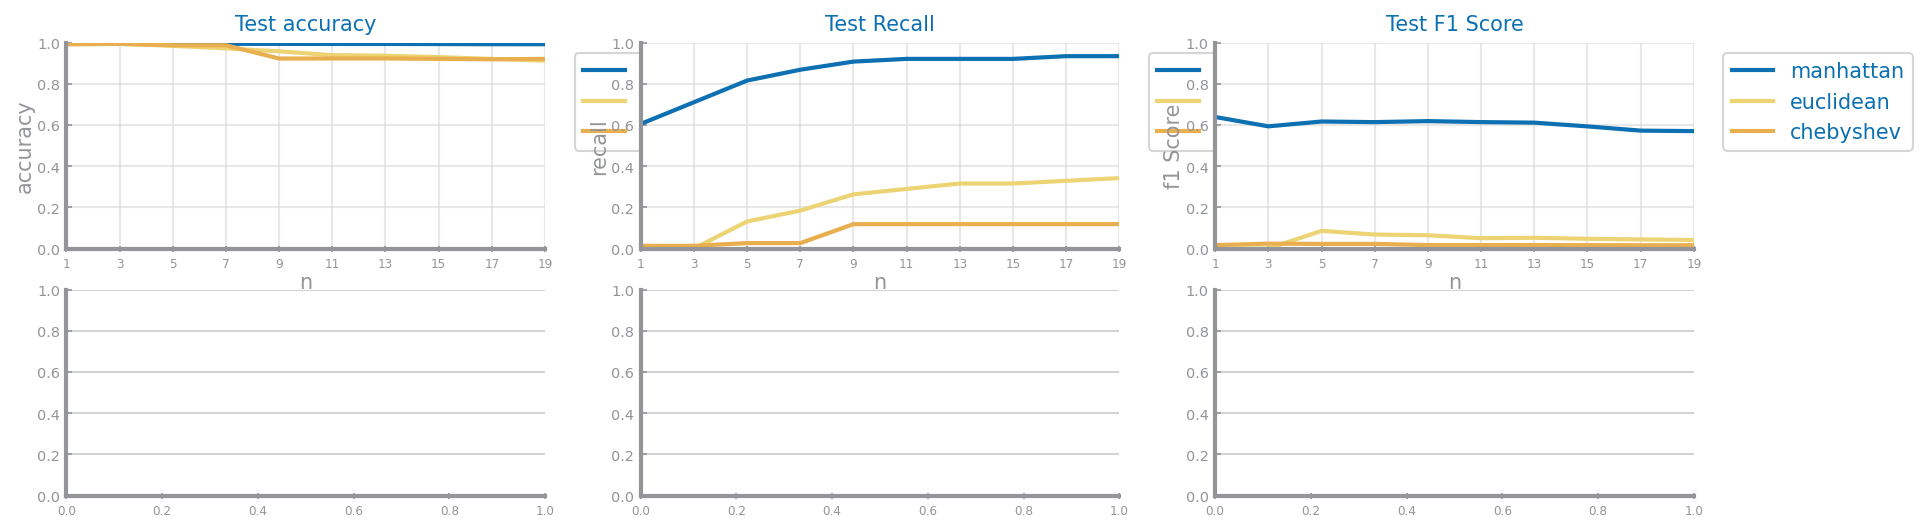

Best results with 1 neighbors and manhattan


In [14]:
target = 'PERSON_INJURY'

train: DataFrame = read_csv('data/train_sets/no_scaling.csv')
trnY: ndarray = train.pop(target).values
trnX: ndarray = train.values
labels = unique(trnY)
labels.sort()

test: DataFrame = read_csv('data/test_sets/no_scaling.csv')
tstY: ndarray = test.pop(target).values
tstX: ndarray = test.values

eval_metric = accuracy_score
nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
dist = ['manhattan', 'euclidean', 'chebyshev']
acc_values = {}
recall_values = {}
f1_values = {}

best = (0, '')
last_best = 0
for d in dist:
    accuracy = []
    recall = []
    f1_score = []

    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(trnX, trnY)
        prd_tst_Y = knn.predict(tstX)
        prd_trn_Y = knn.predict(trnX)
        
        accuracy.append(eval_metric(tstY, prd_tst_Y))
        recall.append(metrics.recall_score(tstY, prd_tst_Y, pos_label='Killed'))
        f1_score.append(metrics.f1_score(tstY, prd_tst_Y, pos_label='Killed'))

        if accuracy[-1] > last_best:
            best = (n, d)
            last_best = accuracy[-1]

    acc_values[d] = accuracy
    recall_values[d] = recall
    f1_values[d] = f1_score

figure()
fig, axs = plt.subplots(2, 3, figsize=(HEIGHT * 3.5, HEIGHT), squeeze=False)
multiple_line_chart(nvalues, acc_values, title='Test accuracy', xlabel='n', ylabel='accuracy', percentage=True, ax=axs[0, 0])
multiple_line_chart(nvalues, recall_values, title='Test Recall', xlabel='n', ylabel='recall', percentage=True, ax=axs[0, 1])
multiple_line_chart(nvalues, f1_values, title='Test F1 Score', xlabel='n', ylabel='f1 Score', percentage=True, ax=axs[0, 2])   
savefig(f'images/{file_tag}_knn_study.png')
show()
print('Best results with %d neighbors and %s'%(best[0], best[1]))

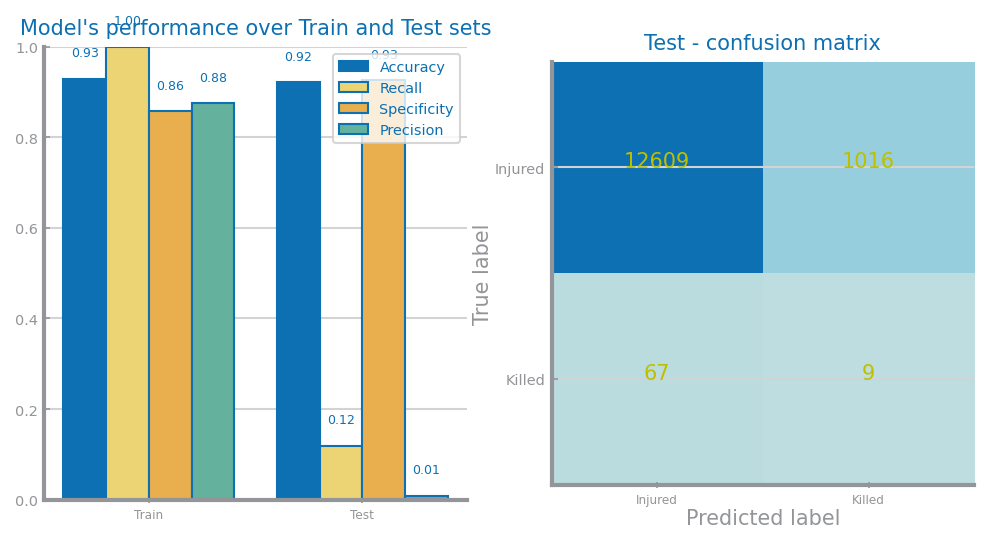

In [15]:
plot_evaluation_results(labels, trnY, prd_trn_Y, tstY, prd_tst_Y)
savefig(f'images/{file_tag}_knn_best.png')

### Scaled & dummified data

<Figure size 600x450 with 0 Axes>

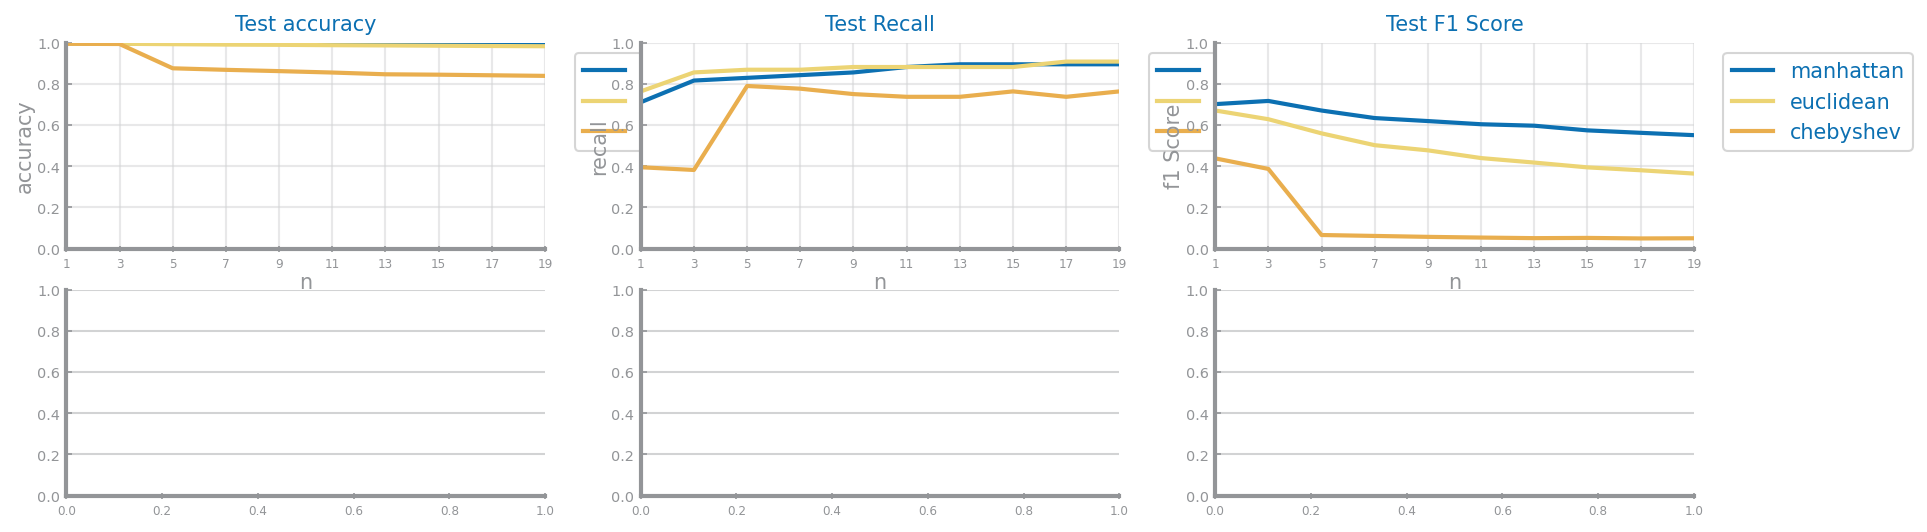

Best results with 1 neighbors and manhattan


In [16]:
target = 'PERSON_INJURY'

train: DataFrame = read_csv('data/train_sets/with_scaling.csv')
trnY: ndarray = train.pop(target).values
trnX: ndarray = train.values
labels = unique(trnY)
labels.sort()

test: DataFrame = read_csv('data/test_sets/with_scaling.csv')
tstY: ndarray = test.pop(target).values
tstX: ndarray = test.values

eval_metric = accuracy_score
nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
dist = ['manhattan', 'euclidean', 'chebyshev']
acc_values = {}
recall_values = {}
f1_values = {}

best = (0, '')
last_best = 0
for d in dist:
    accuracy = []
    recall = []
    f1_score = []

    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(trnX, trnY)
        prd_tst_Y = knn.predict(tstX)
        prd_trn_Y = knn.predict(trnX)
        
        accuracy.append(eval_metric(tstY, prd_tst_Y))
        recall.append(metrics.recall_score(tstY, prd_tst_Y, pos_label='Killed'))
        f1_score.append(metrics.f1_score(tstY, prd_tst_Y, pos_label='Killed'))

        if accuracy[-1] > last_best:
            best = (n, d)
            last_best = accuracy[-1]

    acc_values[d] = accuracy
    recall_values[d] = recall
    f1_values[d] = f1_score

figure()
fig, axs = plt.subplots(2, 3, figsize=(HEIGHT * 3.5, HEIGHT), squeeze=False)
multiple_line_chart(nvalues, acc_values, title='Test accuracy', xlabel='n', ylabel='accuracy', percentage=True, ax=axs[0, 0])
multiple_line_chart(nvalues, recall_values, title='Test Recall', xlabel='n', ylabel='recall', percentage=True, ax=axs[0, 1])
multiple_line_chart(nvalues, f1_values, title='Test F1 Score', xlabel='n', ylabel='f1 Score', percentage=True, ax=axs[0, 2])   
savefig(f'images/{file_tag}_scl_knn_study.png')
show()
print('Best results with %d neighbors and %s'%(best[0], best[1]))

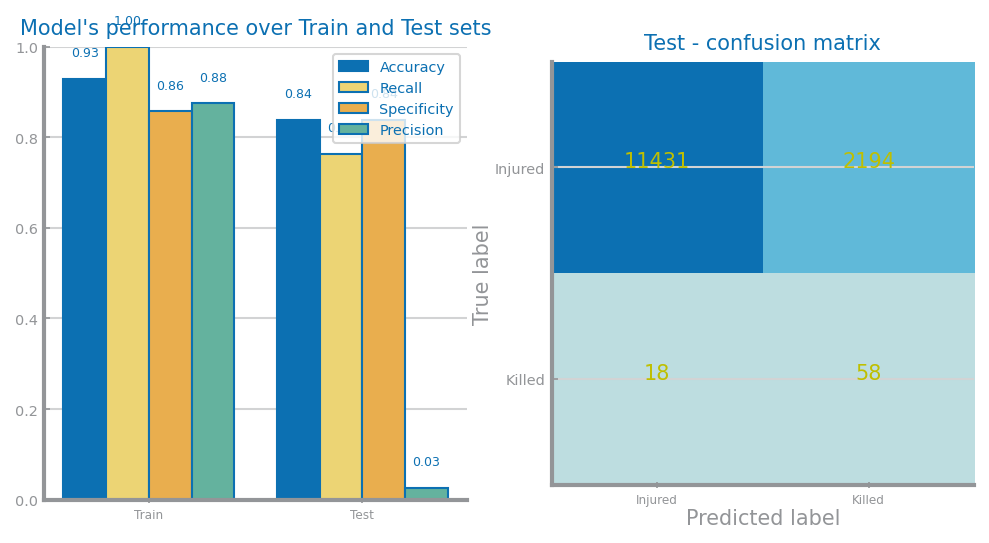

In [17]:
plot_evaluation_results(labels, trnY, prd_trn_Y, tstY, prd_tst_Y)
savefig(f'images/{file_tag}_scl_knn_best.png')